# FILTERS, CANNY EDGE DETECTION, LOG AND DOG

### Roberts edge detection

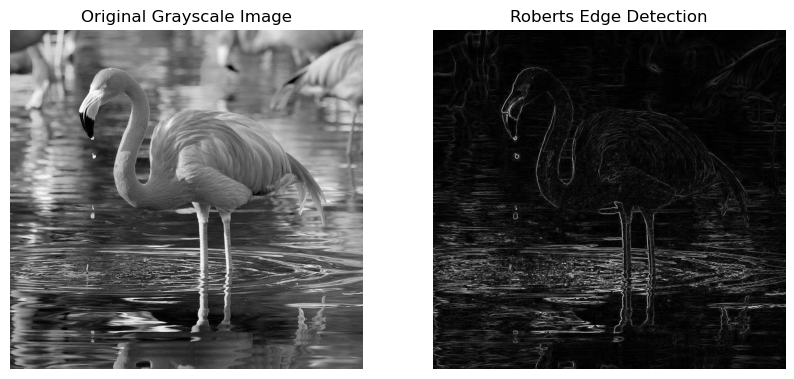

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def roberts_edge_detection(image):
    # Get the image dimensions
    height, width = image.shape
    
    # Define the Robert's cross operator kernels
    Gx = np.array([[1, 0], [0, -1]])  # Gradient in the x direction
    Gy = np.array([[0, 1], [-1, 0]])  # Gradient in the y direction
    
    # Create an empty image to store the edge detected result
    edge_image = np.zeros((height - 1, width - 1), dtype=np.uint8)
    
    # Apply the Robert's operator
    for i in range(height - 1):
        for j in range(width - 1):
            # Apply the Gx kernel
            gx = np.sum(image[i:i+2, j:j+2] * Gx)
            # Apply the Gy kernel
            gy = np.sum(image[i:i+2, j:j+2] * Gy)
            
            # Calculate the gradient magnitude
            edge_image[i, j] = np.sqrt(gx**2 + gy**2)
            
            # Normalize the values to the range [0, 255]
            edge_image[i, j] = np.clip(edge_image[i, j], 0, 255)
    
    return edge_image

# Load the image in grayscale
image = cv2.imread("C:/Users/subha/Downloads/flamingo.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Robert's edge detection
edges = roberts_edge_detection(image)

# Plot the original grayscale image and edge-detected result side by side
plt.figure(figsize=(10, 5))

# Plot the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Plot the edge-detected result
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Roberts Edge Detection")
plt.axis('off')

# Show the result
plt.show()


### Prewitt Edge Detection

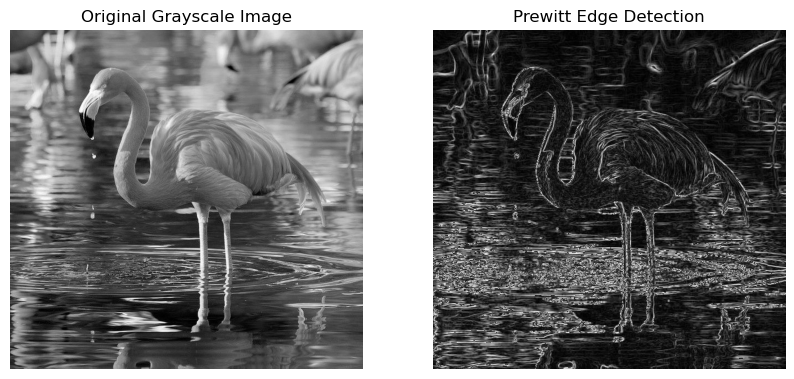

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def prewitt_edge_detection(image):
    # Convert the image to grayscale if it's not already
    
    
    # Get the image dimensions
    height, width = image.shape
    
    # Define the Prewitt operator kernels
    Gx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Gradient in the x direction
    Gy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Gradient in the y direction
    
    # Create an empty image to store the edge detected result
    edge_image = np.zeros((height - 2, width - 2), dtype=np.uint8)
    
    # Apply the Prewitt operator
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Apply the Gx kernel (x-gradient)
            gx = np.sum(image[i-1:i+2, j-1:j+2] * Gx)
            # Apply the Gy kernel (y-gradient)
            gy = np.sum(image[i-1:i+2, j-1:j+2] * Gy)
            
            # Calculate the gradient magnitude
            edge_image[i-1, j-1] = np.sqrt(gx**2 + gy**2)
            
            # Normalize the values to the range [0, 255]
            edge_image[i-1, j-1] = np.clip(edge_image[i-1, j-1], 0, 255)
    
    return edge_image

# Load the image in grayscale
image = cv2.imread("C:/Users/subha/Downloads/flamingo.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Prewitt edge detection
edges = prewitt_edge_detection(image)

# Plot the original grayscale image and edge-detected result side by side
plt.figure(figsize=(10, 5))

# Plot the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Plot the edge-detected result
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

# Show the result
plt.show()


### Canny Edge Detection

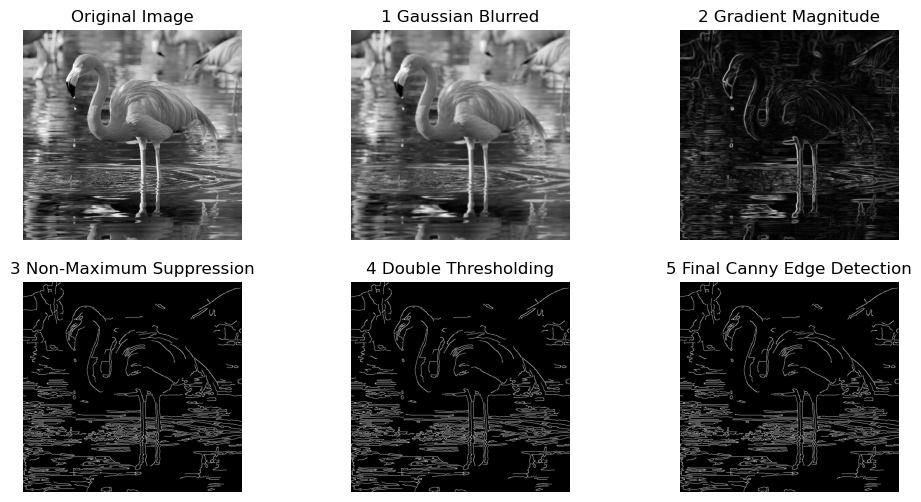

In [11]:
image = cv2.imread("C:/Users/subha/Downloads/flamingo.jpg", cv2.IMREAD_GRAYSCALE)


blurred = cv2.GaussianBlur(image, (5, 5), 1.4)   
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)   
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)   
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)   
gradient_magnitude = np.uint8(gradient_magnitude * 255 / 
np.max(gradient_magnitude)) 
gradient_direction = np.arctan2(sobel_y, sobel_x)   
edges_nms = cv2.Canny(blurred, 50, 150)   
strong_edges = (edges_nms >= 150).astype(np.uint8) * 255   
weak_edges = ((edges_nms >= 50) & (edges_nms < 150)).astype(np.uint8) * 255   
plt.figure(figsize=(12, 6)) 
plt.subplot(2, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.title('Original Image') 
plt.axis("off") 
plt.subplot(2, 3, 2) 
plt.imshow(blurred, cmap='gray') 
plt.title('1 Gaussian Blurred') 
plt.axis("off") 
plt.subplot(2, 3, 3) 
plt.imshow(gradient_magnitude, cmap='gray') 
plt.title('2 Gradient Magnitude') 
plt.axis("off") 
plt.subplot(2, 3, 4) 
plt.imshow(edges_nms, cmap='gray') 
plt.title('3 Non-Maximum Suppression') 
plt.axis("off") 
plt.subplot(2, 3, 5) 
plt.imshow(strong_edges + weak_edges, cmap='gray') 
plt.title('4 Double Thresholding') 
plt.axis("off") 
plt.subplot(2, 3, 6) 
plt.imshow(edges_nms, cmap='gray') 
plt.title('5 Final Canny Edge Detection') 
plt.axis("off") 
plt.show() 

### LOG Edge Detection (Mannual)

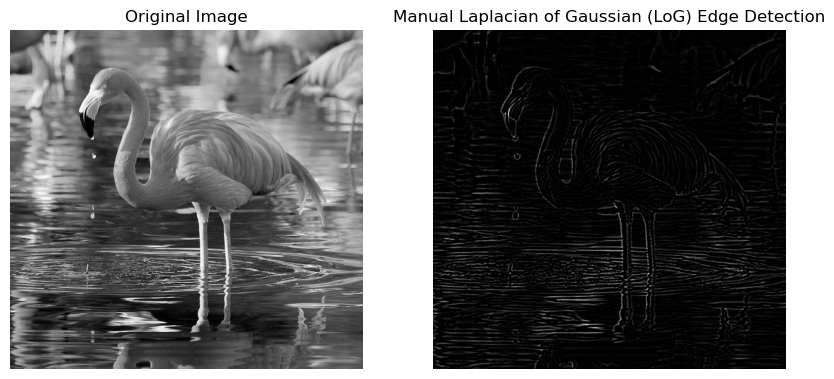

In [13]:
image = cv2.imread("C:/Users/subha/Downloads/flamingo.jpg", cv2.IMREAD_GRAYSCALE)


gaussian_blur = cv2.GaussianBlur(image, (5, 5), 1.4)  
laplacian_kernel = np.array([[0,  1,  0],  
                             [1, -4,  1],  
                             [0,  1,  0]])  # Standard Laplacian kernel 
log_edges = cv2.filter2D(gaussian_blur, -1, laplacian_kernel) 
log_edges = np.abs(log_edges)   
log_edges = (log_edges / np.max(log_edges) * 255).astype(np.uint8)   
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1) 
plt.imshow(image, cmap="gray") 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1, 2, 2) 
plt.imshow(log_edges, cmap="gray") 
plt.title("Manual Laplacian of Gaussian (LoG) Edge Detection") 
plt.axis("off") 
plt.show()

### LOG

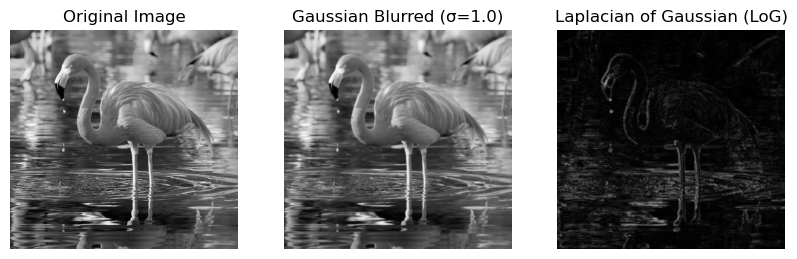

In [15]:
from scipy.ndimage import gaussian_filter 

image = cv2.imread("C:/Users/subha/Downloads/flamingo.jpg", cv2.IMREAD_GRAYSCALE)


image = image.astype(np.float32)   
sigma = 1.0  # Standard deviation for Gaussian smoothing 
smoothed = gaussian_filter(image, sigma=sigma)   
dx = np.zeros_like(smoothed) 
dy = np.zeros_like(smoothed) 
dx[:, 1:-1] = (smoothed[:, 2:] - smoothed[:, :-2]) / 2  
dy[1:-1, :] = (smoothed[2:, :] - smoothed[:-2, :]) / 2   
dxx = np.zeros_like(smoothed) 
dyy = np.zeros_like(smoothed) 
dxx[:, 1:-1] = (dx[:, 2:] - dx[:, :-2]) / 2   
dyy[1:-1, :] = (dy[2:, :] - dy[:-2, :]) / 2   
log = dxx + dyy   
log = np.abs(log)   
log = (log / np.max(log) * 255).astype(np.uint8)   
plt.figure(figsize=(10, 6)) 
plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1, 3, 2) 
plt.imshow(smoothed, cmap='gray') 
plt.title(f"Gaussian Blurred (σ={sigma})") 
plt.axis("off") 
plt.subplot(1, 3, 3) 
plt.imshow(log, cmap='gray') 
plt.title("Laplacian of Gaussian (LoG)") 
plt.axis("off") 
plt.show() 

In [27]:
! pip install scipy


### DOG

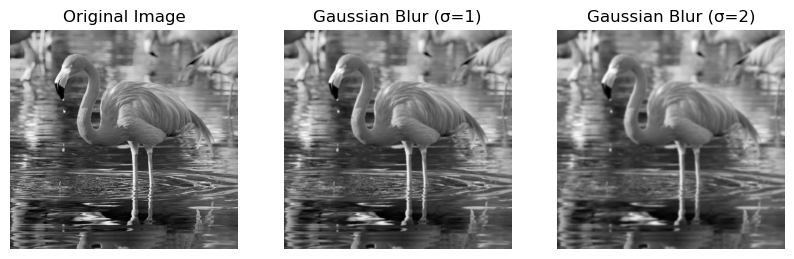

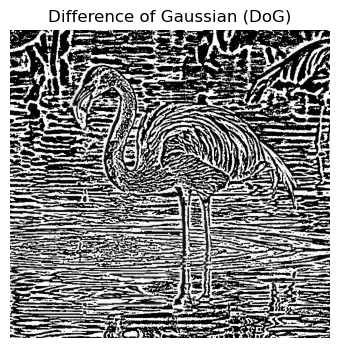

In [17]:
from scipy.ndimage import gaussian_filter 

image = cv2.imread("C:/Users/subha/Downloads/flamingo.jpg", cv2.IMREAD_GRAYSCALE)

sigma1 = 1   
sigma2 = 2  
blurred1 = gaussian_filter(image, sigma=sigma1)   
blurred2 = gaussian_filter(image, sigma=sigma2)   
dog = blurred1 - blurred2   
plt.figure(figsize=(10, 6)) 
plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis("off") 
plt.subplot(1, 3, 2) 
plt.imshow(blurred1, cmap='gray') 
plt.title(f"Gaussian Blur (σ={sigma1})") 
plt.axis("off") 
plt.subplot(1, 3, 3) 
plt.imshow(blurred2, cmap='gray') 
plt.title(f"Gaussian Blur (σ={sigma2})") 
plt.axis("off") 
plt.figure(figsize=(6, 4)) 
plt.imshow(dog, cmap='gray') 
plt.title("Difference of Gaussian (DoG)") 
plt.axis("off") 
plt.show() 